## Random Forest Rent Estimation Model

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os
import matplotlib.pyplot as plt

In [30]:
df = pd.read_parquet("../data/processed/zillow_minimal_rent_cleaned.parquet")
print(df.shape)
df.head()

(22494, 8)


,zpid,rentZestimate,latitude,longitude,bedrooms,bathrooms,livingArea,miles_to_old_well
1,2.104816e+09,1591.0,35.965070,-79.04773,2.0,2.5,1167.0,3.659205
2,4.999716e+07,2515.0,35.900852,-78.98325,3.0,2.0,2389.0,3.890775
3,4.999617e+07,2613.0,35.935074,-78.99854,3.0,3.0,2066.0,3.353474
4,4.999685e+07,2630.0,35.904180,-78.98965,4.0,3.0,2200.0,3.496635
5,6.506431e+07,2173.0,35.944550,-79.02474,2.0,2.0,1060.0,2.687084


In [31]:
# Cap out high-end rent outliers
print("Before filter:", len(df))
df = df[df["rentZestimate"] <= 5000]
print("After filter:", len(df))

Before filter: 22494
After filter: 21122


In [32]:
# Drop ID column if it exists
if "zpid" in df.columns:
    df = df.drop(columns=["zpid"])

In [33]:
# Drop any remaining missing values
df = df.dropna(subset=["rentZestimate", "bedrooms", "bathrooms", "livingArea"])

In [34]:
# Separate features and target
X = df.drop(columns=["rentZestimate"])
y = df["rentZestimate"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

In [36]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [38]:
y_pred = rf.predict(X_test)
r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RF ➞ R² = {r2:.4f},  RMSE = ${rmse:,.0f}")

RF ➞ R² = 0.9093,  RMSE = $270


Woohoo! Our random forest model explains ~91% of the variation in rent prices and are, on average, within $270/month of Zillow's estimates.

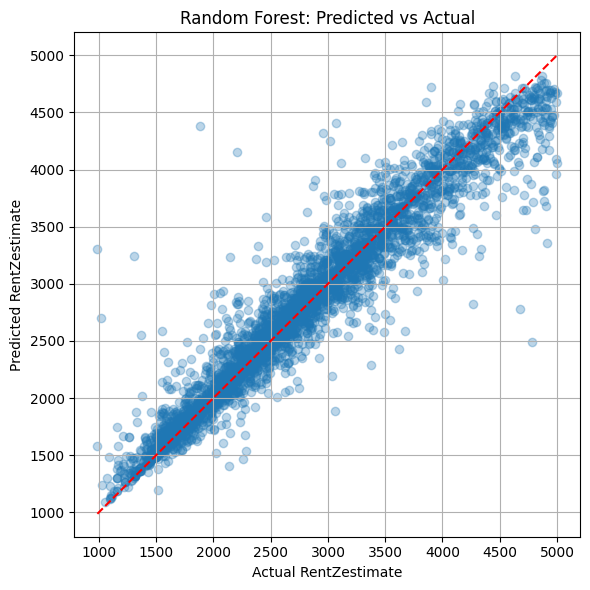

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual RentZestimate")
plt.ylabel("Predicted RentZestimate")
plt.title("Random Forest: Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
import joblib
joblib.dump(rf, "../models/rent_rf_model.pkl")
print("✅ Model saved to ../models/rent_rf_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../models/rent_rf_model.pkl'